In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [28]:
# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

In [29]:
# Explore the dataset
print(titanic_data.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [30]:
# Data Preprocessing
# Drop unnecessary columns and handle missing values
titanic_data = titanic_data.drop(['Name'], axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [31]:
# Convert categorical features to numerical
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

In [32]:
# Define features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Build and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = clf.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [39]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7752808988764045
Confusion Matrix:
[[91 20]
 [20 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       111
           1       0.70      0.70      0.70        67

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



In [40]:
# Feature Importance
feature_importance = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

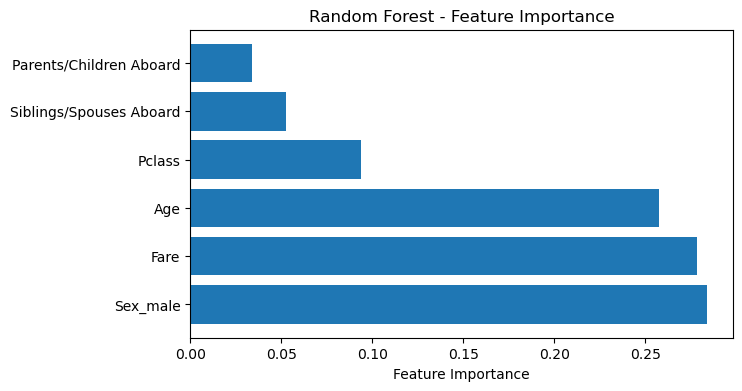

In [42]:
# Plot feature importance
plt.figure(figsize=(7, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()